In [1]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
plt.style.use('ggplot')

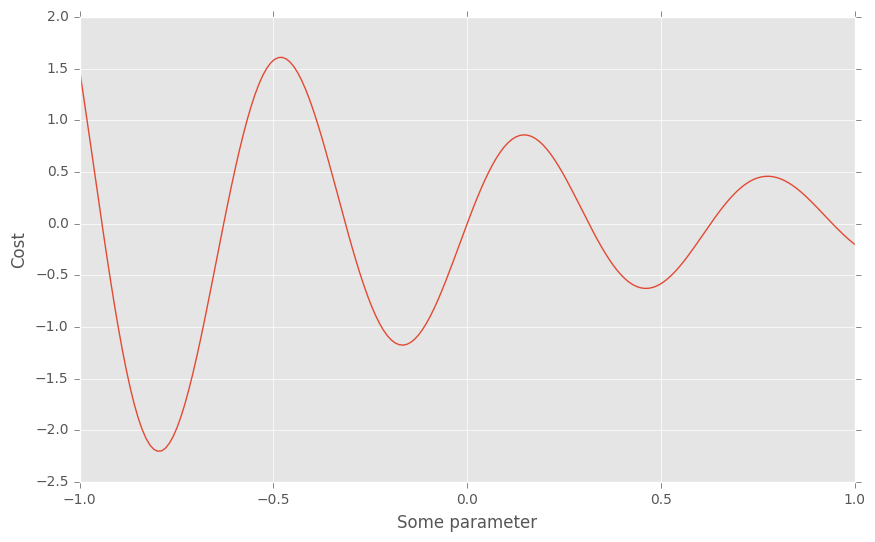

In [2]:
# some cost functions can have local minima

fig = plt.figure(figsize=(10,6))
ax = fig.gca()  #get current axis
x = np.linspace(-1,1,200)
hz = 10
cost = np.sin(hz * x) * np.exp(-x)
ax.set_xlabel('Some parameter')
ax.set_ylabel('Cost')
plt.plot(x, cost)
plt.show()

(199,)
(199,)


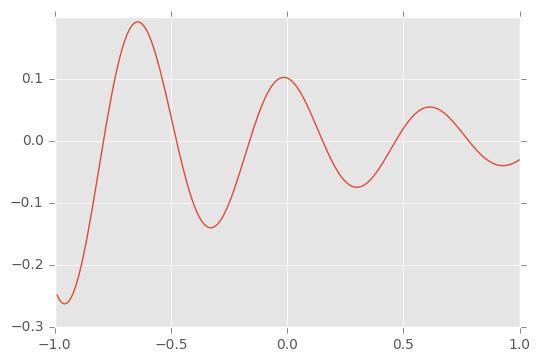

In [3]:
# gradient of cost function at each value of parameter p
gradient = np.diff(cost)

print(x[1:200].shape)
print(gradient.shape)

plt.plot(x[1:200], gradient)

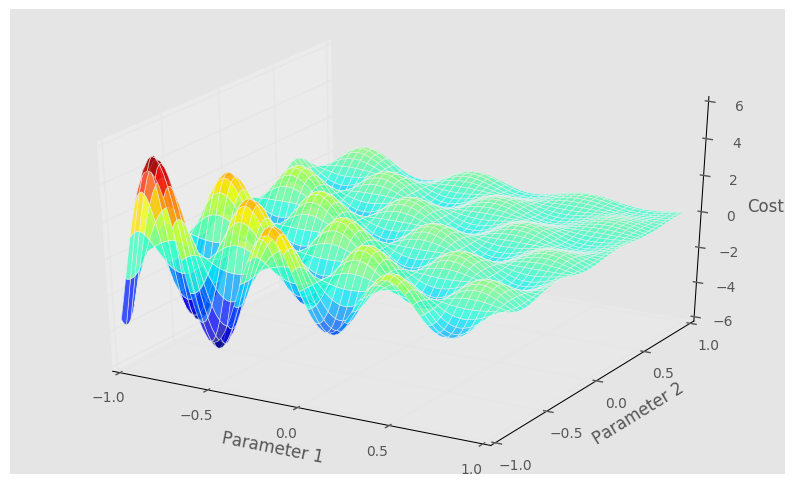

In [4]:
# cost gradient for 2 parameters

from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')
x, y = np.mgrid[-1:1:0.02, -1:1:0.02]
X, Y, Z = x, y, np.sin(hz*x)*np.exp(-x)*np.cos(hz*y)*np.exp(-y)
ax.plot_surface(X,Y,Z,rstride=2, cstride=2, alpha=0.75, cmap='jet', shade=False)
ax.set_xlabel('Parameter 1')
ax.set_ylabel('Parameter 2')
ax.set_zlabel('Cost')


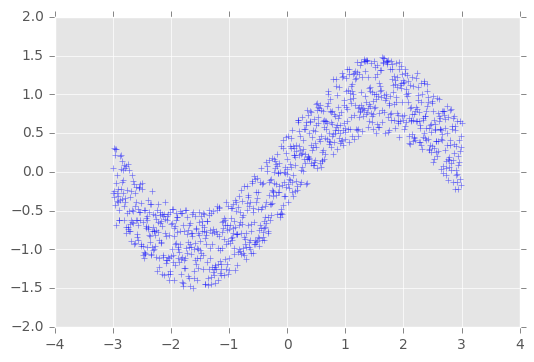

In [5]:
# create a neural network

# create some data
n_observations = 1000
xs = np.linspace(-3, 3, n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
plt.scatter(xs, ys, alpha=0.5, marker='+')

(array([  14.,   42.,   97.,  211.,  227.,  214.,  131.,   49.,    9.,    6.]),
 array([-2.87378573, -2.25474916, -1.63571258, -1.016676  , -0.39763942,
         0.22139716,  0.84043374,  1.45947032,  2.0785069 ,  2.69754348,
         3.31658006]),
 <a list of 10 Patch objects>)

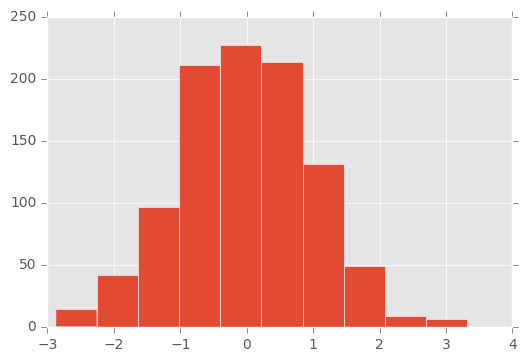

In [6]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

sess = tf.InteractiveSession()
n = tf.random_normal([1000]).eval()
plt.hist(n)

(array([   5.,   19.,   74.,  156.,  245.,  251.,  160.,   60.,   25.,    5.]),
 array([-0.31188649, -0.24839772, -0.18490896, -0.12142019, -0.05793142,
         0.00555734,  0.06904611,  0.13253488,  0.19602364,  0.25951241,
         0.32300118]),
 <a list of 10 Patch objects>)

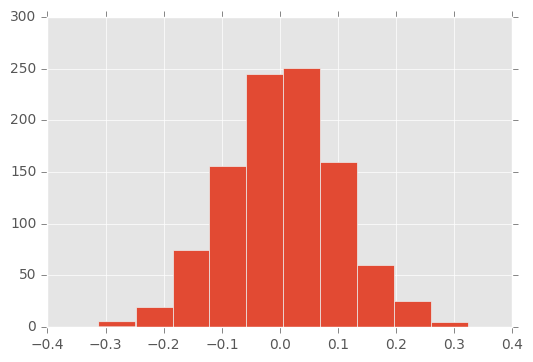

In [7]:
n = tf.random_normal([1000], stddev=0.1).eval()
plt.hist(n)

In [8]:
# define model parameters

W = tf.Variable(tf.random_normal([1], dtype=tf.float32, stddev=0.1), name='Weight')
B = tf.Variable(tf.constant([0], dtype=tf.float32), name='Bias')

y_pred = X * W + B

In [9]:
cost = tf.reduce_mean(tf.abs(y_pred - Y))

In [10]:
# training parameters

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

/usr/local/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


0.56643
0.47289
0.430518
0.414947
0.409856
0.407358
0.40629
0.405759
0.405557
0.405476
0.405432


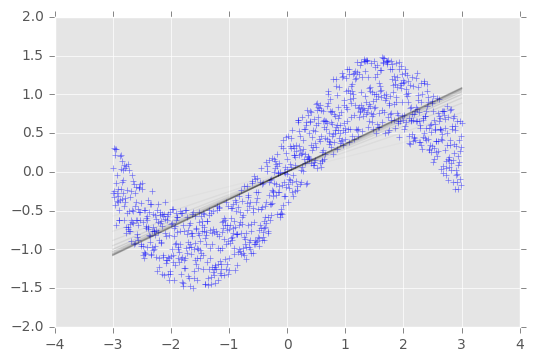

In [11]:
# iteration

n_iterations = 500
fig, ax = plt.subplots(1,1)
plt.scatter(xs, ys, alpha=0.5, marker='+')

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        sess.run(optimizer, feed_dict={X: xs, Y: ys})
        training_cost = sess.run(cost, feed_dict={X: xs, Y:ys})
        
        if it_i%10 == 0:
            ys_pred = sess.run(y_pred, feed_dict={X: xs})
            
            ax.plot(xs, ys_pred, 'k', alpha=it_i/n_iterations)
            fig.show()
            #fig.draw()
            
            print(training_cost)
        
        # if we optimized model params enough, stop iteration
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            break
            
        prev_training_cost = training_cost

In [12]:
# mini batch generation

idxs = np.arange(100)
batch_size = 10
n_batches = int(len(idxs) / batch_size)

for i in range(n_batches):
    print(idxs[i * batch_size : (i+1)*batch_size])

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]
[50 51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69]
[70 71 72 73 74 75 76 77 78 79]
[80 81 82 83 84 85 86 87 88 89]
[90 91 92 93 94 95 96 97 98 99]


In [13]:
# we need to randomize batch content
# to avoid the nn overfit the order of inputs

rand_idxs = np.random.permutation(idxs)

for i in range(n_batches):
    print(rand_idxs[i*batch_size : (i+1)*batch_size])

[51 28 89 58 73  1 40 26 38 82]
[78 46 36 66 35  0 39 30 63 90]
[50 59 47 34 15 62  3  5 43 21]
[77 53 60  7 87 24 55 45 41 19]
[49 97 69 74 57 92  6 17 54  9]
[72 84 14 29 33 12 32 70 76 95]
[23 93 91 22 68 71 11 13 42 44]
[99 48 37 88 56 86 18 83 94 98]
[ 8 10 80 96  4 31 52 85 65 27]
[67 64 79 25 20 61 75  2 81 16]


0.512781
0.459455
0.421341
0.43759
0.397945
0.369404
0.346192
0.399992
0.430257
0.375184
0.446341
0.509235
0.379266
0.388389
0.421136
0.376022
0.467246
0.434584
0.423612
0.406228
0.44538
0.385276
0.404726
0.385135
0.433888
0.400938
0.390989
0.456199
0.424339
0.375655
0.394206
0.376602
0.445511
0.433972
0.436194
0.377067
0.379317
0.411138
0.449696
0.408205
0.365094
0.409213
0.403009
0.37809
0.396284
0.406159
0.403021
0.42193
0.407538
0.363153


/usr/local/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


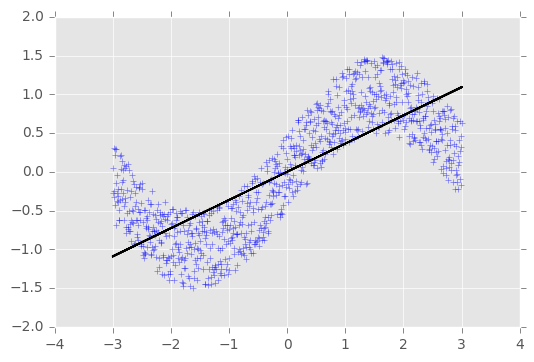

In [14]:
# train nn 

batch_size = 100
fig, ax = plt.subplots(1,1)
ax.scatter(xs, ys, alpha=0.5, marker='+')
ax.set_xlim([-4,4])
ax.set_ylim([-2,2])

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i*batch_size : (batch_i+1)*batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})
            
        training_cost = sess.run(cost, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})
        
        if it_i % 10 == 0:
            ys_pred = sess.run(y_pred, feed_dict={X: xs})
            ax.plot(xs, ys_pred, 'k', alpha=it_i/n_iterations)
            print(training_cost)

fig.show()

In [15]:
def train(X, Y, y_pred, n_iterations=100, batch_size=200, learning_rate=0.02):
    cost = tf.reduce_mean(tf.abs(y_pred - Y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    fig, ax = plt.subplots(1,1)
    ax.scatter(xs, ys, alpha=0.5, marker='+')
    ax.set_xlim([-4,4])
    ax.set_ylim([-2,2])
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        prev_training_cost = 0.0
        for it_i in range(n_iterations):
            idxs = np.random.permutation(range(len(xs)))
            n_batches = len(idxs) // batch_size
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
                sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

            training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

            if it_i % 10 == 0:
                ys_pred = y_pred.eval(feed_dict={X: xs}, session=sess)
                ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
                print(training_cost)
    fig.show()
    plt.draw()

1.9194
1.57343
1.69759
0.728327
1.6952
1.30003
1.52045
0.990298
0.951438
0.98002


/usr/local/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


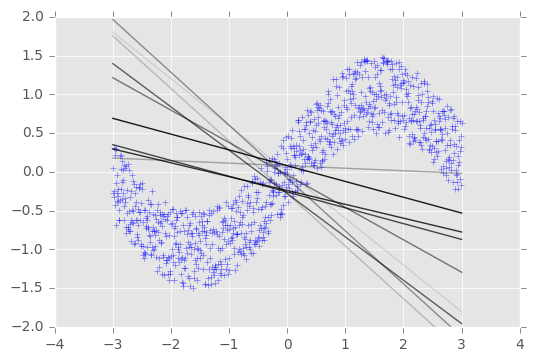

In [16]:
# create the network

n_neurons = 100

W = tf.Variable(tf.random_normal([1, n_neurons], stddev=0.1))

b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]))

h = tf.matmul(tf.expand_dims(X, 1), W) + b

y_pred = tf.reduce_sum(h, reduction_indices=1)

train(X, Y, y_pred)

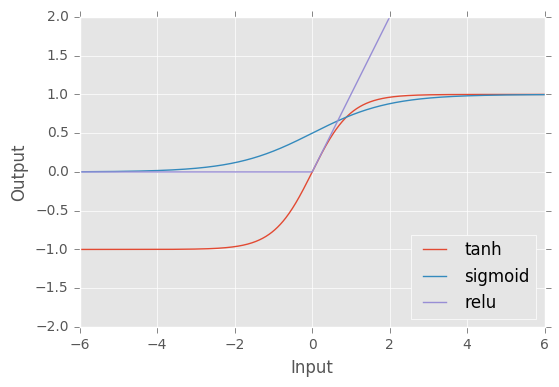

In [17]:
# non-linearities, activation function

sess = tf.InteractiveSession()
x = np.linspace(-6,6,1000)
plt.plot(x, tf.nn.tanh(x).eval(), label='tanh')
plt.plot(x, tf.nn.sigmoid(x).eval(), label='sigmoid')
plt.plot(x, tf.nn.relu(x).eval(), label='relu')
plt.legend(loc='lower right')
plt.xlim([-6,6])
plt.ylim([-2,2])
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid('on')

In [18]:
# create a single layer

def linear(X, n_input, n_output, activation=None):
    W = tf.Variable(tf.random_normal([n_input, n_output], stddev=0.1), name='W')
    b = tf.Variable(tf.constant(0.0, dtype=tf.float32, shape=[n_output]), name='b')
    h = tf.nn.tanh(tf.matmul(X, W) + b)
    return h

In [19]:
# explore the graph

from tensorflow.python.framework import ops
ops.reset_default_graph()

# get the current graph
g = tf.get_default_graph()

# list the oprerations in the graph
[op.name for op in g.get_operations()]

# create a network
X = tf.placeholder(tf.float32, name='X')
h = linear(X, 2, 10)

[op.name for op in g.get_operations()]


['X',
 'random_normal/shape',
 'random_normal/mean',
 'random_normal/stddev',
 'random_normal/RandomStandardNormal',
 'random_normal/mul',
 'random_normal',
 'W',
 'W/Assign',
 'W/read',
 'Const',
 'b',
 'b/Assign',
 'b/read',
 'MatMul',
 'add',
 'Tanh']

In [20]:
# the names in the graph are not helpful
# we cant distinguish operations in different layers
# we can use scopes to group them

def linear(X, n_input, n_output, activation=None, scope=None):
    with tf.variable_scope(scope or 'linear'):
        W = tf.get_variable(
           name='W',
           shape=[n_input, n_output],
           initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))
        b = tf.get_variable(
            name='b',
            shape=[n_output],
            initializer=tf.constant_initializer())
        h = tf.matmul(X,W)+b
        if activation is not None:
            h = activation(h)
        return h

In [21]:
# check the generated graph again

# first clear the graph
from tensorflow.python.framework import ops

# let's get the current graph
g = tf.get_default_graph()

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

# let's create a new network
X = tf.placeholder(tf.float32, name='X')
h = linear(X, 2, 10, scope='layer1')

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'random_normal/shape',
 'random_normal/mean',
 'random_normal/stddev',
 'random_normal/RandomStandardNormal',
 'random_normal/mul',
 'random_normal',
 'W',
 'W/Assign',
 'W/read',
 'Const',
 'b',
 'b/Assign',
 'b/read',
 'MatMul',
 'add',
 'Tanh',
 'X_1',
 'layer1/W',
 'layer1/W/Initializer/random_normal/shape',
 'layer1/W/Initializer/random_normal/mean',
 'layer1/W/Initializer/random_normal/stddev',
 'layer1/W/Initializer/random_normal/RandomStandardNormal',
 'layer1/W/Initializer/random_normal/mul',
 'layer1/W/Initializer/random_normal',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b',
 'layer1/b/Initializer/Const',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/add']

In [22]:
# Let's connect the output of our last network to another one!

# Wow we just made a Deep Network!  Let's make it deeper!
h2 = linear(h, 10, 10, scope='layer2')

# Again!
h3 = linear(h2, 10, 3, scope='layer3')

# Now when we look at the names of the operations in the graph, we can directly see which operations belong to each layer!
[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'random_normal/shape',
 'random_normal/mean',
 'random_normal/stddev',
 'random_normal/RandomStandardNormal',
 'random_normal/mul',
 'random_normal',
 'W',
 'W/Assign',
 'W/read',
 'Const',
 'b',
 'b/Assign',
 'b/read',
 'MatMul',
 'add',
 'Tanh',
 'X_1',
 'layer1/W',
 'layer1/W/Initializer/random_normal/shape',
 'layer1/W/Initializer/random_normal/mean',
 'layer1/W/Initializer/random_normal/stddev',
 'layer1/W/Initializer/random_normal/RandomStandardNormal',
 'layer1/W/Initializer/random_normal/mul',
 'layer1/W/Initializer/random_normal',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b',
 'layer1/b/Initializer/Const',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/add',
 'layer2/W',
 'layer2/W/Initializer/random_normal/shape',
 'layer2/W/Initializer/random_normal/mean',
 'layer2/W/Initializer/random_normal/stddev',
 'layer2/W/Initializer/random_normal/RandomStandardNormal',
 'layer2/W/Initializer/random_normal/mul',
 'layer2/W/Initializer/random_normal',
 'la

# Painting Neural Network

In [23]:
# Image painting neural network

from scipy.misc import imresize

160


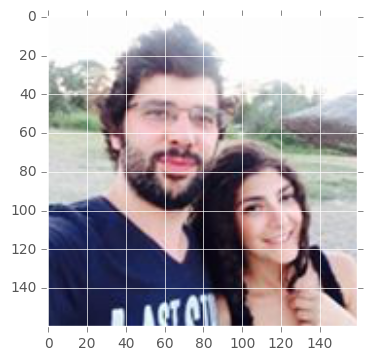

In [24]:
img = plt.imread('ee.jpg')
print(img.shape[0])
plt.imshow(img)

In [25]:
# imput : pixel coordinates
xs = []

# target : pixel color value
ys = []

for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        xs.append([row, col])
        ys.append(img[row, col])
        
#convert lists to array
xs = np.array(xs)
ys = np.array(ys)

# normalize input by mean and std dev
xs = (xs - np.mean(xs))/np.std(xs)
        
print(xs.shape, ys.shape)

(25600, 2) (25600, 3)


In [26]:
X = tf.placeholder(tf.float32, shape=[None, 2], name="X")
Y = tf.placeholder(tf.float32, shape=[None, 3], name="Y")

In [27]:
def create_layer(X, n_input, n_output, activation=None, scope=None):
    with tf.variable_scope(scope or "linear"):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))
        b = tf.get_variable(
            name='b',
            shape=[n_output],
            initializer=tf.constant_initializer())
        h = tf.matmul(X, W) + b
        if activation is not None:
            h = activation(h)
        return h

In [28]:
n_neurons = [2, 160, 160, 160, 160, 160, 160, 3]

current_input = X
for layer_i in range(1, len(n_neurons)):
    current_input = create_layer(
        X=current_input,
        n_input=n_neurons[layer_i - 1],
        n_output=n_neurons[layer_i],
        activation=tf.nn.relu if (layer_i+1) < len(n_neurons) else None,
        scope='layer_' + str(layer_i))
Y_pred = current_input

In [29]:
cost = tf.reduce_mean(tf.reduce_sum(tf.abs(Y_pred - Y), reduction_indices=1))

In [30]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

0 110.057
1 93.071
2 82.8198
3 81.6481
4 70.9228
5 67.0743
6 63.4624
7 61.4776
8 60.2022
9 56.919
10 57.6975
11 55.855
12 55.2305
13 55.6466
14 52.9715
15 53.7354
16 50.1248
17 52.7263
18 50.3735
19 49.7399


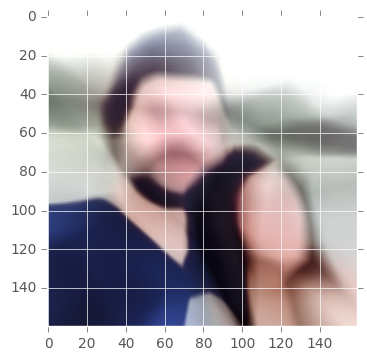

20 49.1146
21 49.9576
22 45.4661
23 45.7184
24 46.8585
25 44.8324
26 42.5933
27 43.9533
28 44.9781
29 42.1664
30 44.2419
31 41.0788
32 45.0385
33 44.8129
34 42.5112
35 45.5889
36 45.0861
37 43.1646
38 39.5751
39 39.4997


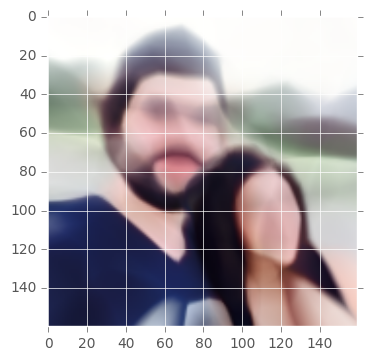

40 41.7046
41 36.7517
42 40.336
43 39.4012
44 37.6406
45 36.938
46 40.9631
47 39.7583
48 39.6696
49 36.7126
50 38.9003
51 36.8188
52 38.8962
53 36.7228
54 37.1783
55 36.166
56 37.9294
57 38.3808
58 34.1726
59 34.1606


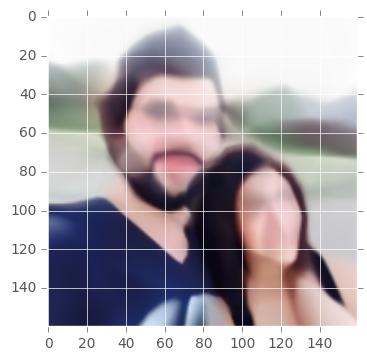

60 34.9157
61 36.6161
62 36.1834
63 34.2514
64 36.1778
65 36.494
66 35.9166
67 34.4308
68 33.8157
69 34.3645
70 33.5436
71 34.969
72 33.1395
73 35.8652
74 34.9795
75 35.3948
76 34.1241
77 34.0736
78 33.4121
79 33.5817


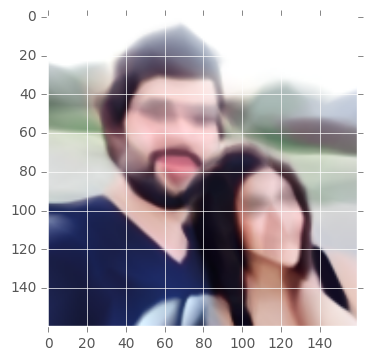

80 37.1834
81 31.5138
82 30.6347
83 32.7347
84 31.8967
85 33.983
86 35.3903
87 35.8732
88 30.0122
89 31.2555
90 32.4259
91 29.585
92 31.7954
93 30.2709
94 31.4578
95 30.6292
96 30.4563
97 32.322
98 30.6802
99 32.1455


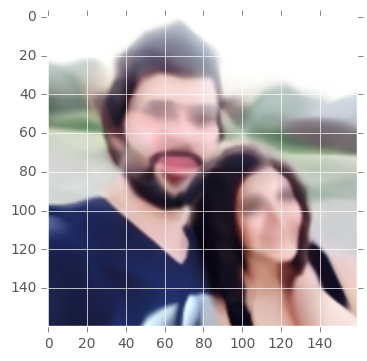

100 35.4427
101 32.9181
102 28.2065
103 30.8979
104 32.5886
105 28.9277
106 30.1756
107 29.6312
108 29.2469
109 31.0515
110 28.6133
111 31.4625
112 29.376
113 31.0707
114 30.5709
115 28.8658
116 29.0183
117 28.1048
118 31.5769
119 30.8124


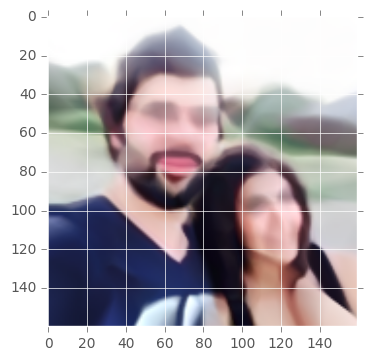

120 30.2815
121 29.4561
122 29.045
123 29.8191
124 27.9538
125 31.408
126 34.0201
127 26.9892
128 27.8329
129 30.4693
130 30.8716
131 30.6397
132 28.4496
133 29.1882
134 26.9389
135 31.79
136 29.8453
137 28.0907
138 27.3415
139 28.485


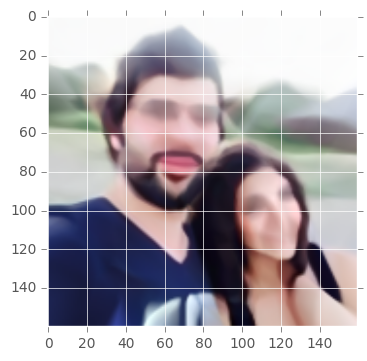

140 27.3185
141 28.8515
142 28.0736
143 27.1344
144 26.324
145 25.3117
146 28.8017
147 28.0493
148 27.3726
149 27.3318
150 33.2447
151 27.081
152 27.4794
153 26.52
154 26.1635
155 26.5354
156 25.6783
157 25.7022
158 25.4783
159 26.6439


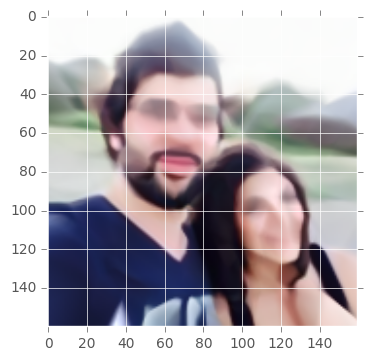

160 29.4045
161 25.386
162 26.4125
163 25.2349
164 27.9119
165 27.8841
166 29.2798
167 24.8263
168 24.4463
169 26.5376
170 28.5175
171 25.8676
172 24.4909
173 27.4699
174 25.6717
175 27.8614
176 26.2481
177 26.4542
178 25.7641
179 24.6459


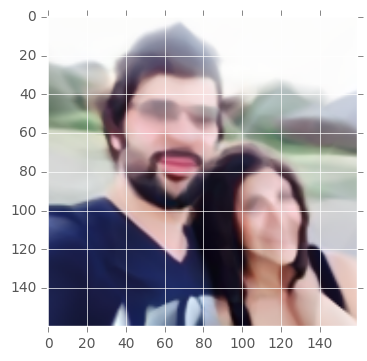

180 26.7368
181 25.4994
182 25.0223
183 28.2498
184 26.6237
185 25.4217
186 24.4865
187 25.5034
188 23.0669
189 23.7319
190 24.0812
191 24.9256
192 23.7792
193 25.1519
194 25.4294
195 23.4314
196 28.1705
197 27.2093
198 26.1727
199 24.9708


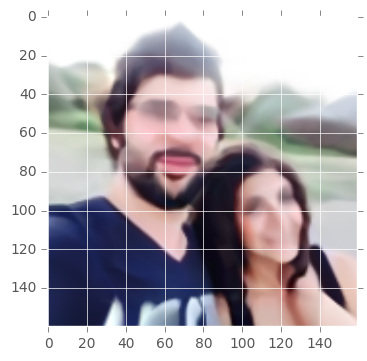

200 26.8325
201 23.5554
202 23.5459
203 23.7613
204 25.3543
205 24.6123
206 24.7243
207 24.9504
208 23.6383
209 25.1953
210 25.4793
211 24.8691
212 24.8056
213 23.9755
214 25.5065
215 24.6365
216 24.7548
217 23.4804
218 24.1961
219 23.5775


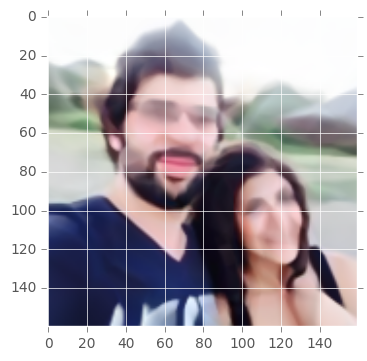

220 25.2756
221 23.5811
222 23.9513
223 24.1194
224 23.5888
225 22.6107
226 24.7045
227 24.1404
228 23.7002
229 25.4137
230 25.4708
231 26.4139
232 24.3186
233 23.7672
234 23.8707
235 24.1252
236 22.4502
237 22.8374
238 23.1603
239 22.9966


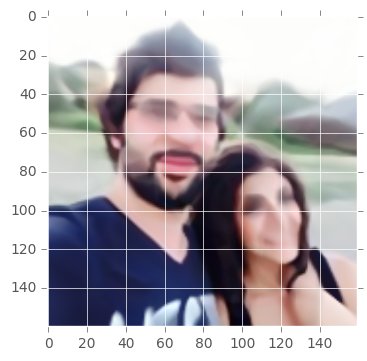

240 21.1063
241 22.7286
242 23.4541
243 23.237
244 23.0413
245 24.1825
246 22.6851
247 23.8454
248 22.7108
249 24.2344
250 23.4483
251 22.3088
252 20.9405
253 22.9332
254 24.9556
255 23.3309
256 21.8322
257 21.1948
258 22.9797
259 22.1434


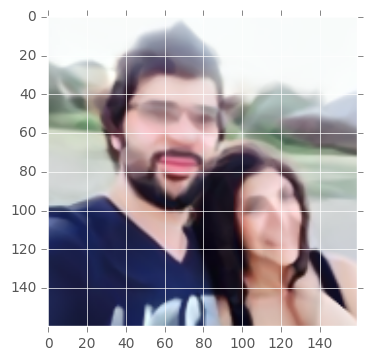

260 23.9951
261 21.5041
262 22.9632
263 23.964
264 22.2637
265 23.823
266 20.6974
267 21.8899
268 23.8367
269 22.7426
270 21.5669
271 22.0247
272 21.4757
273 21.4871
274 21.6398
275 23.974
276 21.2901
277 21.9412
278 23.851
279 21.0549


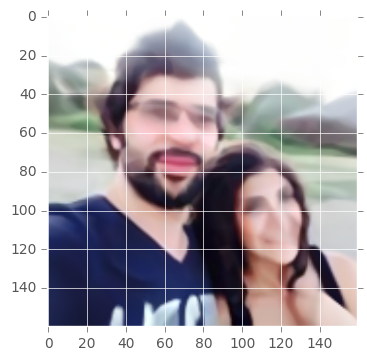

280 24.2306
281 21.48
282 23.042
283 24.7283
284 23.4521
285 24.1128
286 22.0115
287 21.6623
288 24.1441
289 21.5525
290 20.7294
291 21.5727
292 23.2255
293 22.7069
294 22.7585
295 22.5346
296 21.6822
297 22.7547
298 21.9117
299 22.2959


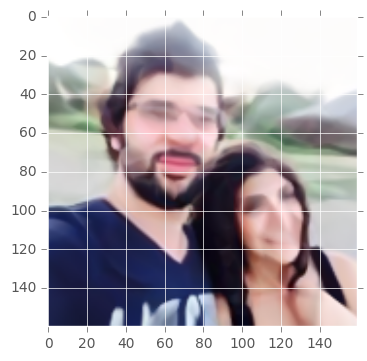

300 22.2334
301 20.7174
302 22.1302
303 20.999
304 21.4991
305 22.205
306 22.4479
307 23.6877
308 21.242
309 24.7161
310 19.9073
311 19.8603
312 21.6815
313 19.5448
314 20.9557
315 20.0045
316 21.7027
317 21.1827
318 20.9858
319 20.988


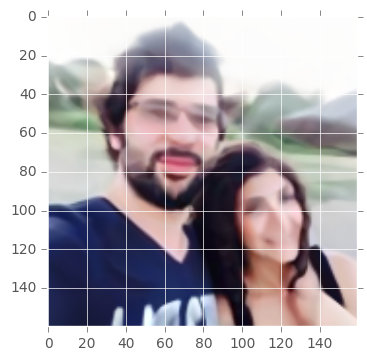

320 21.3189
321 21.6827
322 22.5325
323 20.2947
324 21.6052
325 21.4719
326 20.3722
327 21.2097
328 20.4113
329 20.8436
330 20.3862
331 20.8639
332 20.5773
333 24.2452
334 20.8748
335 20.8197
336 21.2525
337 21.5598
338 18.7583
339 23.3785


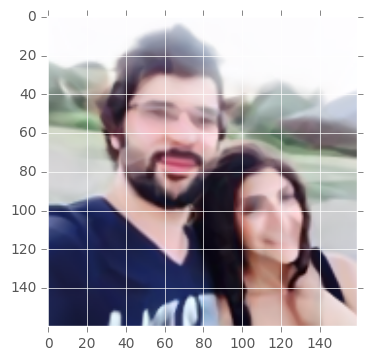

340 20.3307
341 23.9261
342 19.7375
343 20.8156
344 23.6773
345 19.8043
346 20.0846
347 21.5333
348 22.0048
349 19.5256
350 20.804
351 21.4763
352 20.956
353 21.1107
354 21.6369
355 19.7736
356 20.3405
357 21.3731
358 19.2738
359 19.4649


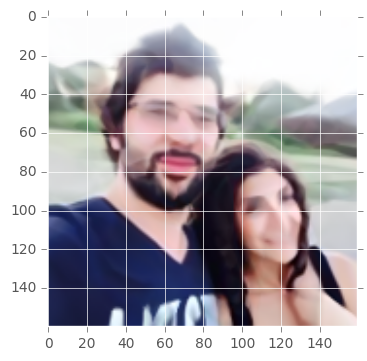

360 21.2227
361 20.781
362 21.3256
363 18.5591
364 24.11
365 21.3568
366 19.5515
367 21.3411
368 20.097
369 19.4521
370 19.8946
371 21.1791
372 21.4076
373 19.5694
374 19.4944
375 19.6404
376 20.125
377 23.7533
378 17.8128
379 18.5172


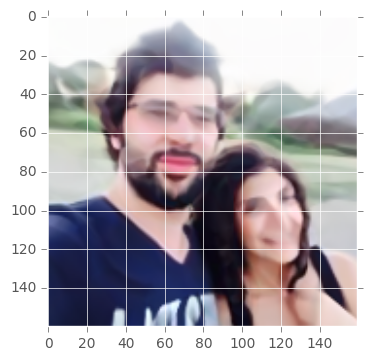

380 20.5827
381 20.6771
382 20.0183
383 19.057
384 18.8633
385 19.6919
386 17.9622
387 19.5852
388 20.8493
389 17.333
390 21.7484
391 21.4336
392 22.0668
393 19.6396
394 19.5059
395 20.5336
396 19.2135
397 18.2115
398 21.1533
399 18.0591


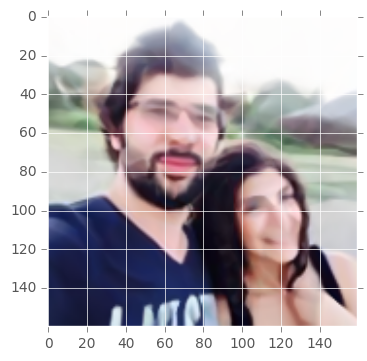

400 18.7021
401 19.769
402 17.5969
403 20.5288
404 18.5917
405 20.4902
406 18.2835
407 18.2411
408 21.0632
409 21.0026
410 21.1988
411 19.766
412 19.4293
413 18.7126
414 19.22
415 19.4579
416 19.092
417 20.9375
418 20.282
419 19.3996


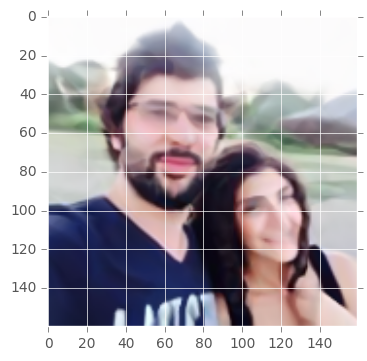

420 18.4759
421 18.8364
422 20.2136
423 20.1459
424 20.1606
425 18.038
426 18.4715
427 18.3879
428 19.348
429 20.3293
430 18.3926
431 18.2396
432 19.0015
433 17.999
434 19.3779
435 23.8489
436 19.7655
437 18.6268
438 19.3703
439 18.768


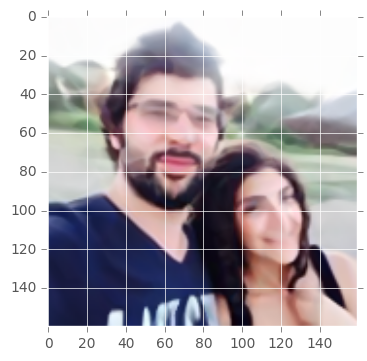

440 18.0181
441 18.49
442 20.3044
443 18.2752
444 18.7496
445 18.5204
446 18.5742
447 18.7464
448 18.482
449 18.7105
450 17.3658
451 19.5854
452 18.6868
453 17.4843
454 18.9417
455 18.2881
456 18.5509
457 19.5836
458 19.3183
459 18.1221


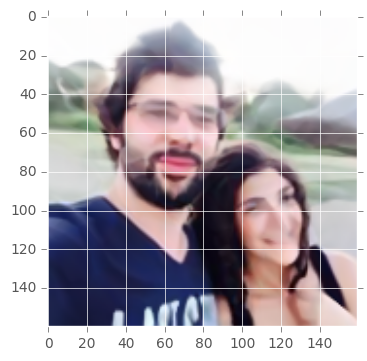

460 19.888
461 17.8197
462 18.6466
463 18.7858
464 21.1895
465 18.1212
466 19.2035
467 17.6399
468 17.954
469 20.6562
470 17.4778
471 18.3593
472 18.2272
473 17.5058
474 18.2292
475 17.4989
476 17.8667
477 18.3879
478 18.7921
479 18.1682


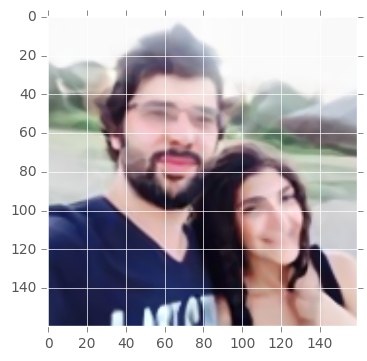

480 18.4143
481 17.997
482 16.6743
483 18.9429
484 18.4138
485 18.5848
486 18.9515
487 17.2428
488 17.7866
489 18.4317
490 18.3898
491 19.9164
492 16.9326
493 21.4912
494 19.0169
495 17.7329
496 18.8449
497 17.9159
498 19.2423
499 17.6962


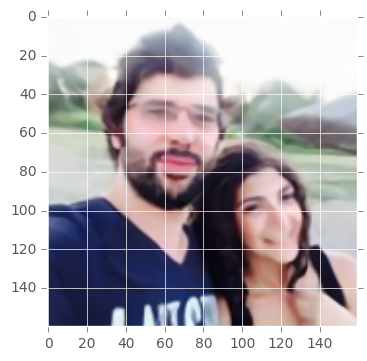

In [37]:
# training

n_iterations = 500
batch_size = 50

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})
        print(it_i, training_cost)
        
        if (it_i+1) % 20 == 0:
            ys_pred = sess.run(Y_pred, feed_dict={X: xs})
            fig, ax = plt.subplots(1,1)
            img = np.clip(ys_pred.reshape(img.shape), 0, 255).astype(np.uint8)
            plt.imshow(img)
            plt.show()
            